# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL

url = "https://api.openweathermap.org/data/2.5/weather"
#?q={city name}&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "?appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | tuktoyaktuk
Processing Record 4 of Set 1 | neuquen
Processing Record 5 of Set 1 | kruisfontein
Processing Record 6 of Set 1 | ambilobe
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | gat
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | kaitangata
Processing Record 12 of Set 1 | flinders
Processing Record 13 of Set 1 | taoudenni
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | udachnyy
Processing Record 16 of Set 1 | severo-kurilsk
Processing Record 17 of Set 1 | miles city
Processing Record 18 of Set 1 | rae bareli
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | dikson
Processing Record 22 of Set 1 | carnarvon
Processing Record 23 of Set 1 | hithadhoo


In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,291.37,91,100,3.91,ZA,1682286221
1,hilo,19.7297,-155.0900,303.31,70,75,4.63,US,1682286223
2,tuktoyaktuk,69.4541,-133.0374,254.15,78,20,3.09,CA,1682286224
3,neuquen,-38.9516,-68.0591,299.09,36,0,2.57,AR,1682285963
4,kruisfontein,-34.0033,24.7314,292.53,71,100,1.67,ZA,1682285969


In [38]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [39]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,291.37,91,100,3.91,ZA,1682286221
1,hilo,19.7297,-155.0900,303.31,70,75,4.63,US,1682286223
2,tuktoyaktuk,69.4541,-133.0374,254.15,78,20,3.09,CA,1682286224
3,neuquen,-38.9516,-68.0591,299.09,36,0,2.57,AR,1682285963
4,kruisfontein,-34.0033,24.7314,292.53,71,100,1.67,ZA,1682285969


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

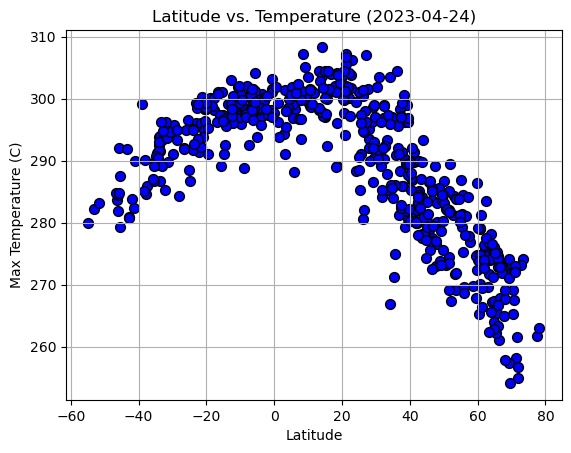

In [40]:
# Build scatter plot for latitude vs. temperature
                                       
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], s=50, color="blue", edgecolors='black')                              
# Incorporate the other graph properties
plt.title("Latitude vs. Temperature (2023-04-24)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

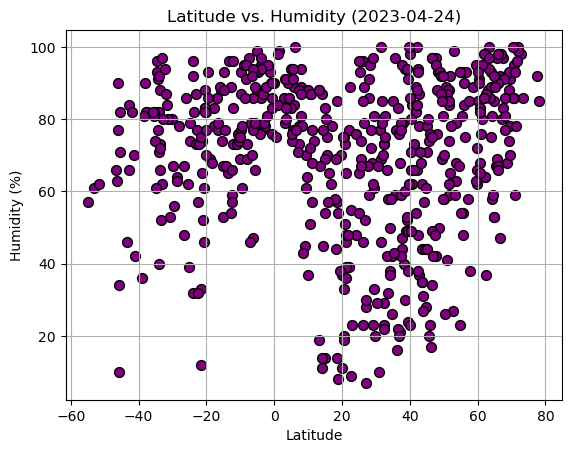

In [41]:
# Build the scatter plots for latitude vs. humidity

x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']

plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], s=50, color="purple", edgecolors='black')

# Incorporate the other graph properties

plt.title("Latitude vs. Humidity (2023-04-24)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

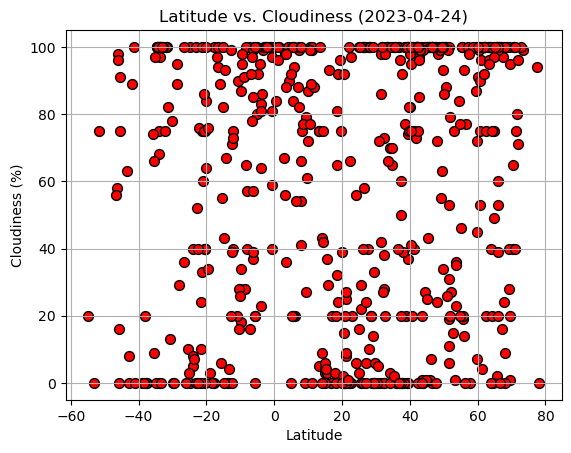

In [42]:
# Build the scatter plots for latitude vs. cloudiness

x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']

plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], s=50, color="red", edgecolors='black')

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness (2023-04-24)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

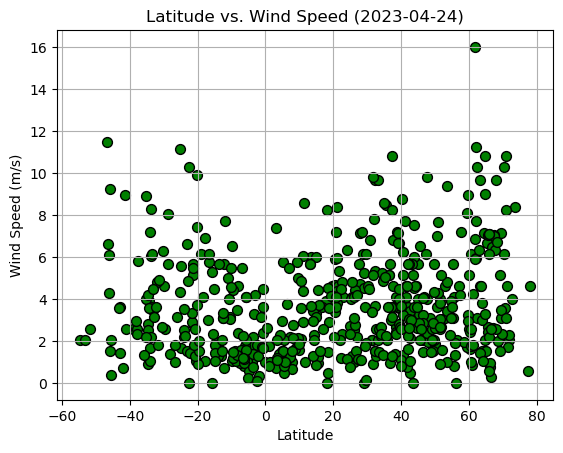

In [44]:
# Build the scatter plots for latitude vs. wind speed

x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']

plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], s=50, color="green", edgecolors='black')

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed (2023-04-24)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [45]:
# Define a function to create Linear Regression plots

def linregress_plot(x, y, xlabel, ylabel, title):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

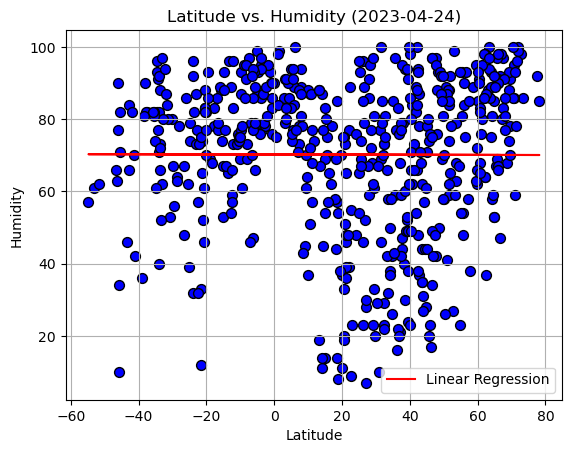

In [46]:
# Define a function to create Linear Regression plots

x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']

plt.scatter(x_values, y_values, s=50, color="blue", edgecolors='black')

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
line = slope * x_values + intercept
plt.plot(x_values, line, 'r', label='Linear Regression')


# plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], s=50, color="green", edgecolors='black')
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(5.8,0.8), fontsize=15,color='red')

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity (2023-04-24)")
plt.xlabel("Latitude")
plt.ylabel('Humidity')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# # # Show plot
plt.legend()
plt.show()

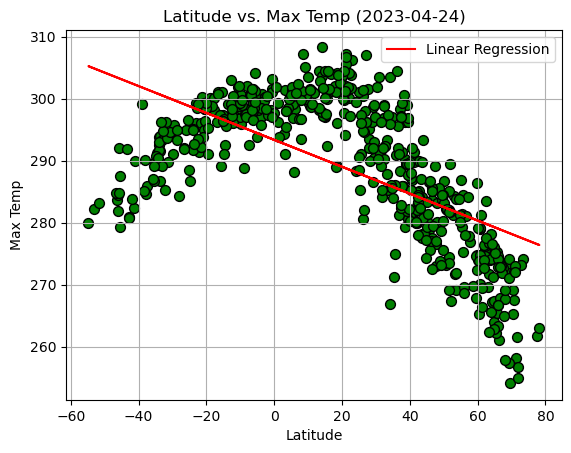

In [47]:
# Define a function to create Linear Regression plots

x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

plt.scatter(x_values, y_values,s=50, color="green", edgecolors='black')

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
line = slope * x_values + intercept
plt.plot(x_values, line, 'r', label='Linear Regression')


# plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], s=50, color="green", edgecolors='black')
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(5.8,0.8), fontsize=15,color='red')

# Incorporate the other graph properties
plt.title("Latitude vs. Max Temp (2023-04-24)")
plt.xlabel("Latitude")
plt.ylabel('Max Temp')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# # # Show plot
plt.legend()
plt.show()

In [48]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hilo,19.7297,-155.0900,303.31,70,75,4.63,US,1682286223
2,tuktoyaktuk,69.4541,-133.0374,254.15,78,20,3.09,CA,1682286224
8,gat,31.6100,34.7642,291.70,100,86,2.05,IL,1682286230
12,taoudenni,22.6783,-3.9836,303.89,9,0,2.32,ML,1682286232
14,udachnyy,66.4167,112.4000,261.12,98,100,0.74,RU,1682286236


In [49]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,291.37,91,100,3.91,ZA,1682286221
3,neuquen,-38.9516,-68.0591,299.09,36,0,2.57,AR,1682285963
4,kruisfontein,-34.0033,24.7314,292.53,71,100,1.67,ZA,1682285969
5,ambilobe,-13.2000,49.0500,296.14,96,4,1.26,MG,1682286227
6,vaini,-21.2000,-175.2000,300.24,74,75,5.66,TO,1682286228


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.870704250995313


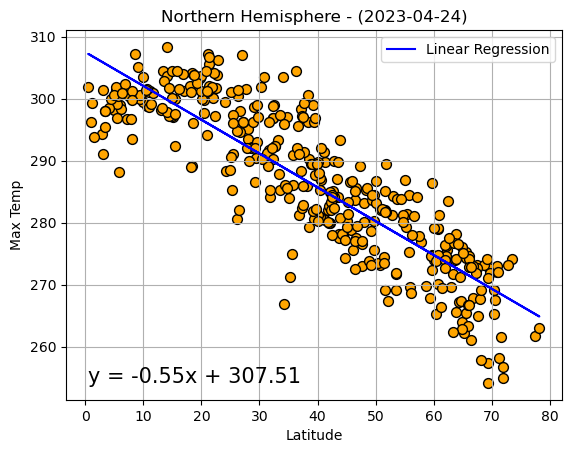

In [50]:
# Linear regression on Northern Hemisphere

x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']

def linregress_plot(x, y, xlabel, ylabel, title):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x, y, s=50, color='orange', edgecolors='black')
    plt.plot(x, slope * x + intercept, 'b', label='Linear Regression')
    plt.annotate(line_eq, (x.min(), y.min()), fontsize=15, color='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    
    print(f"The r-value is: {(r_value)}")
    
# Call function to create scatterplot, line plot, and annotation
linregress_plot(x, y, "Latitude", "Max Temp", "Northern Hemisphere - (2023-04-24)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.legend()
plt.show()

The r-value is: 0.8013928101302688


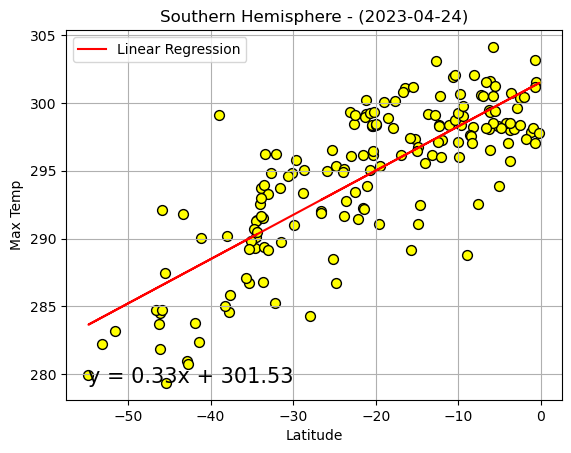

In [51]:
# Linear regression on Southern Hemisphere

x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']

def linregress_plot(x, y, xlabel, ylabel, title):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x, y, s=50, color='yellow', edgecolors='black')
    plt.plot(x, slope * x + intercept, 'r', label='Linear Regression')
    plt.annotate(line_eq, (x.min(), y.min()), fontsize=15, color='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    
    print(f"The r-value is: {(r_value)}")
# Call function to create scatterplot, line plot, and annotation
linregress_plot(x, y, "Latitude", "Max Temp", "Southern Hemisphere - (2023-04-24)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.legend()
plt.show()

It appears there is a high temperature in area's that are closer to the equator (0 degrees), the temperature comparison between the Northern and the Southern Hemisphere would differ depending on the time of year and the position of the earth facing the sun.  In addition; other factors such as ocean currents, can also influence temperature patterns and create regional variations within each hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.20351446836465026


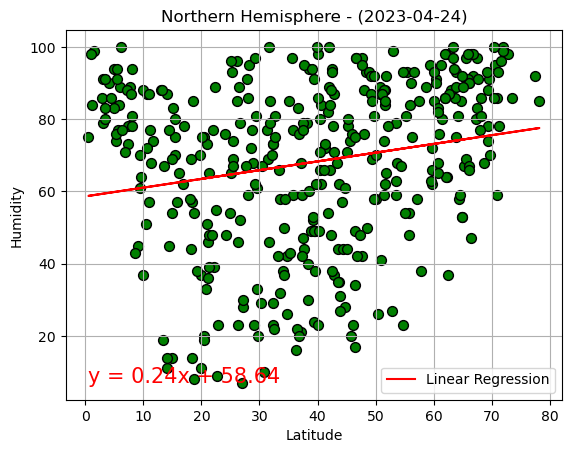

In [52]:
# Northern Hemisphere

x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']

def linregress_plot(x, y, xlabel, ylabel, title):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x, y, s=50, color='green', edgecolors='black')
    plt.plot(x, slope * x + intercept, 'r', label='Linear Regression')
    plt.annotate(line_eq, (x.min(), y.min()), fontsize=15, color='red')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    
    print(f"The r-value is: {(r_value)}")
    
# Call function to create scatterplot, line plot, and annotation
linregress_plot(x, y, "Latitude", "Humidity", "Northern Hemisphere - (2023-04-24)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.legend()
plt.show()

The r-value is: 0.31348269366173964


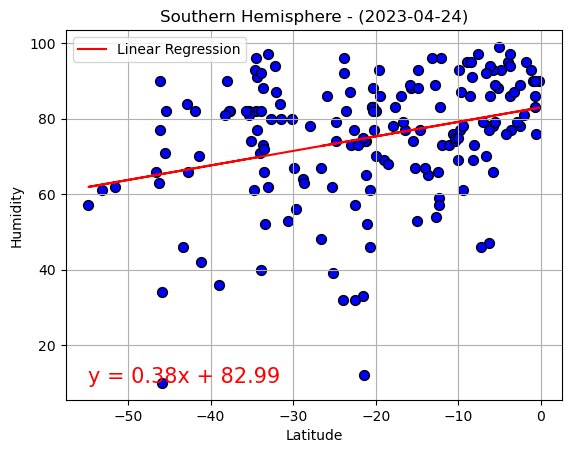

In [53]:
# Southern Hemisphere

x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']

def linregress_plot(x, y, xlabel, ylabel, title):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x, y, s=50, color='blue', edgecolors='black')
    plt.plot(x, slope * x + intercept, 'r', label='Linear Regression')
    plt.annotate(line_eq, (x.min(), y.min()), fontsize=15, color='red')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    
    print(f"The r-value is: {(r_value)}")

# Call function to create scatterplot, line plot, and annotation
linregress_plot(x, y, "Latitude", "Humidity", "Southern Hemisphere - (2023-04-24)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.legend()
plt.show()



**Discussion about the linear relationship:** There isn't a clear difference in the linear regression relationship between the Northern and the Southern Hemisphere however there is a larger amount of cities in the Northern Hemispher above the 60% Humidity range than in the Southern Hemispher.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.14000302157249522


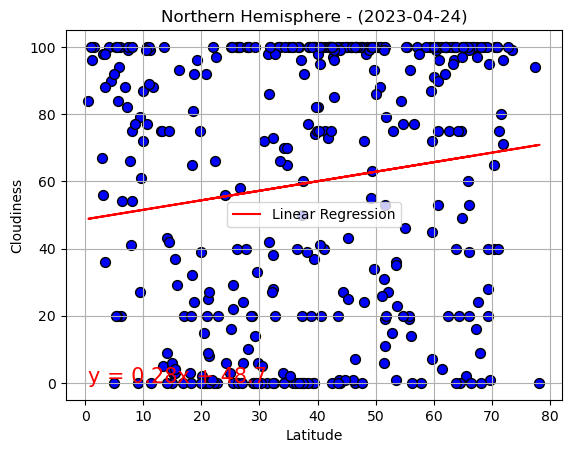

In [54]:
# Northern Hemisphere

x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']

def linregress_plot(x, y, xlabel, ylabel, title):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x, y, s=50, color='blue', edgecolors='black')
    plt.plot(x, slope * x + intercept, 'r', label='Linear Regression')
    plt.annotate(line_eq, (x.min(), y.min()), fontsize=15, color='red')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    
    print(f"The r-value is: {(r_value)}")

# Call function to create scatterplot, line plot, and annotation
linregress_plot(x, y, "Latitude", "Cloudiness", "Northern Hemisphere - (2023-04-24)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.legend()
plt.show()

The r-value is: 0.16605314215117528


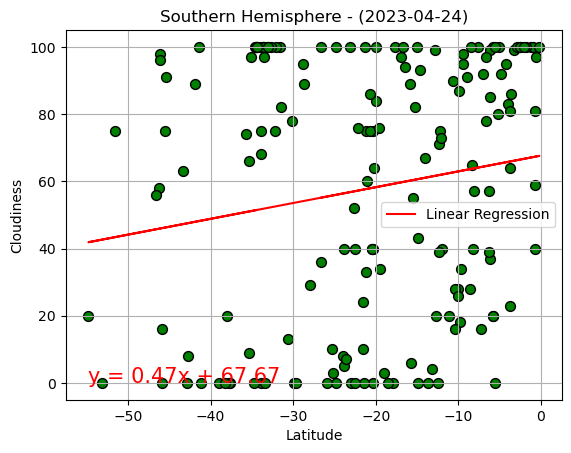

In [55]:
# Southern Hemisphere

x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']

def linregress_plot(x, y, xlabel, ylabel, title):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x, y, s=50, color='green', edgecolors='black')
    plt.plot(x, slope * x + intercept, 'r', label='Linear Regression')
    plt.annotate(line_eq, (x.min(), y.min()), fontsize=15, color='red')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    
    print(f"The r-value is: {(r_value)}")

# Call function to create scatterplot, line plot, and annotation
linregress_plot(x, y, "Latitude", "Cloudiness", "Southern Hemisphere - (2023-04-24)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.legend()
plt.show()

There isn't a strong relationship between latitude and cloudiness.  It's interesting to see there is quite the number of cities in both the Northern and Southern Hemisphere with 100% cloud coverage. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.2140162292353463


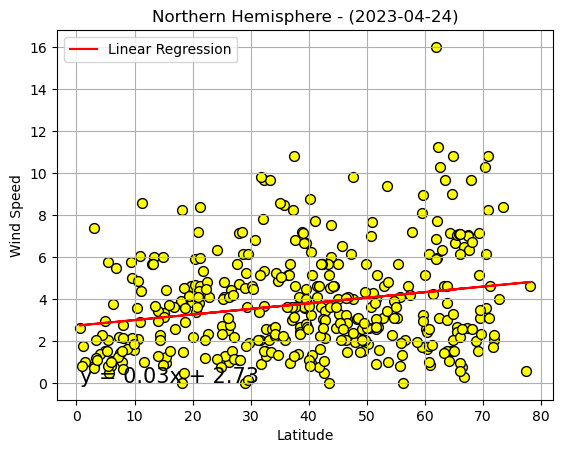

In [56]:
# Northern Hemisphere

x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']

def linregress_plot(x, y, xlabel, ylabel, title):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x, y, s=50, color='yellow', edgecolors='black')
    plt.plot(x, slope * x + intercept, 'r', label='Linear Regression')
    plt.annotate(line_eq, (x.min(), y.min()), fontsize=15, color='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    
    print(f"The r-value is: {(r_value)}")
# Call function to create scatterplot, line plot, and annotation
linregress_plot(x, y, "Latitude", "Wind Speed", "Northern Hemisphere - (2023-04-24)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.legend()
plt.show()

The r-value is: -0.2783999754685822


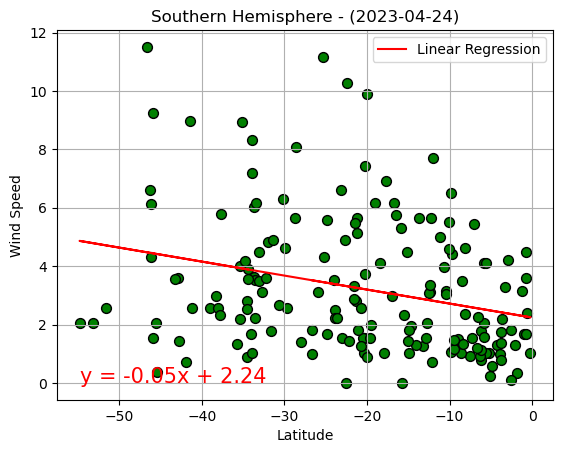

In [57]:
# Southern Hemisphere

x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']

def linregress_plot(x, y, xlabel, ylabel, title):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x, y, s=50, color='green', edgecolors='black')
    plt.plot(x, slope * x + intercept, 'r', label='Linear Regression')
    plt.annotate(line_eq, (x.min(), y.min()), fontsize=15, color='red')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    
    print(f"The r-value is: {(r_value)}")
# Call function to create scatterplot, line plot, and annotation
linregress_plot(x, y, "Latitude", "Wind Speed", "Southern Hemisphere - (2023-04-24)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.legend()
plt.show()

There is no strong relationship between latitude and wind speed between the Northern or the Southern Hemispher